**#Section A — Loading the Dataset**

In this section, the Air Quality dataset is loaded into a Pandas DataFrame. <br>
The dataset is taken from the UCI Machine Learning Repository ([link](https://archive.ics.uci.edu/dataset/360/air+quality)).<br>
It contains hourly measurements of pollutants and sensor responses recorded in an Italian city.

The data is stored in a CSV file with semicolon (;) separators, and missing values are encoded as -200, which will be handled during the preprocessing stage. Also the last rows are empty, so they would be displayed as NaN, the same thing with the last 2 columns

In [1]:
import pandas as pd

df = pd.read_csv("dataset/AirQualityUCI.csv", sep=';', decimal=',', na_values=-200)
df = df.rename(columns={
    "CO(GT)": "CO",
    "C6H6(GT)": "Benzene",
    "NO2(GT)": "NO2",
    "NMHC(GT)": "NMHC",
    "PT08.S1(CO)": "Sensor_CO",
    "PT08.S2(NMHC)": "Sensor_NMHC",
    "PT08.S4(NO2)": "Sensor_NO2",
    "T": "Temperature",
    "RH": "Humidity",
    "AH": "AbsHumidity"
})

df.head

<bound method NDFrame.head of             Date      Time   CO  Sensor_CO   NMHC  Benzene  Sensor_NMHC  \
0     10/03/2004  18.00.00  2.6     1360.0  150.0     11.9       1046.0   
1     10/03/2004  19.00.00  2.0     1292.0  112.0      9.4        955.0   
2     10/03/2004  20.00.00  2.2     1402.0   88.0      9.0        939.0   
3     10/03/2004  21.00.00  2.2     1376.0   80.0      9.2        948.0   
4     10/03/2004  22.00.00  1.6     1272.0   51.0      6.5        836.0   
...          ...       ...  ...        ...    ...      ...          ...   
9466         NaN       NaN  NaN        NaN    NaN      NaN          NaN   
9467         NaN       NaN  NaN        NaN    NaN      NaN          NaN   
9468         NaN       NaN  NaN        NaN    NaN      NaN          NaN   
9469         NaN       NaN  NaN        NaN    NaN      NaN          NaN   
9470         NaN       NaN  NaN        NaN    NaN      NaN          NaN   

      NOx(GT)  PT08.S3(NOx)    NO2  Sensor_NO2  PT08.S5(O3)  Temperat

**Dataset Information**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          9357 non-null   object 
 1   Time          9357 non-null   object 
 2   CO            7674 non-null   float64
 3   Sensor_CO     8991 non-null   float64
 4   NMHC          914 non-null    float64
 5   Benzene       8991 non-null   float64
 6   Sensor_NMHC   8991 non-null   float64
 7   NOx(GT)       7718 non-null   float64
 8   PT08.S3(NOx)  8991 non-null   float64
 9   NO2           7715 non-null   float64
 10  Sensor_NO2    8991 non-null   float64
 11  PT08.S5(O3)   8991 non-null   float64
 12  Temperature   8991 non-null   float64
 13  Humidity      8991 non-null   float64
 14  AbsHumidity   8991 non-null   float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


****

**#Section B — Exploratory Data Analysis**

In this section, we explore the structure of the dataset, examine statistical properties of each variable, and visualize relationships and distributions.<br>
Each step includes justification to demonstrate why it is relevant for understanding the data before modeling.

**Summary Statistics**

Summary statistics provide insight into the central tendency (mean, median), spread (standard deviation), and range of numerical features.

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CO,7674.0,2.152750,1.453252,0.1000,1.1000,1.8000,2.9000,11.900
Sensor_CO,8991.0,1099.833166,217.080037,647.0000,937.0000,1063.0000,1231.0000,2040.000
NMHC,914.0,218.811816,204.459921,7.0000,67.0000,150.0000,297.0000,1189.000
Benzene,8991.0,10.083105,7.449820,0.1000,4.4000,8.2000,14.0000,63.700
Sensor_NMHC,8991.0,939.153376,266.831429,383.0000,734.5000,909.0000,1116.0000,2214.000
NOx(GT),7718.0,246.896735,212.979168,2.0000,98.0000,180.0000,326.0000,1479.000
PT08.S3(NOx),8991.0,835.493605,256.817320,322.0000,658.0000,806.0000,969.5000,2683.000
NO2,7715.0,113.091251,48.370108,2.0000,78.0000,109.0000,142.0000,340.000
Sensor_NO2,8991.0,1456.264598,346.206794,551.0000,1227.0000,1463.0000,1674.0000,2775.000
PT08.S5(O3),8991.0,1022.906128,398.484288,221.0000,731.5000,963.0000,1273.5000,2523.000


**Correlation Matrix**

In [4]:
import matplotlib.pyplot as plt

df_numeric = df.select_dtypes(include=['float64', 'int64'])
corr = df_numeric.corr()

corr.round(2)

,CO,Sensor_CO,NMHC,Benzene,Sensor_NMHC,NOx(GT),PT08.S3(NOx),NO2,Sensor_NO2,PT08.S5(O3),Temperature,Humidity,AbsHumidity,Unnamed: 15,Unnamed: 16
CO,1.00,0.88,0.89,0.93,0.92,0.80,-0.70,0.68,0.63,0.85,0.02,0.05,0.05,NaN,NaN
Sensor_CO,0.88,1.00,0.79,0.88,0.89,0.71,-0.77,0.64,0.68,0.90,0.05,0.11,0.14,NaN,NaN
NMHC,0.89,0.79,1.00,0.90,0.88,0.81,-0.77,0.73,0.85,0.77,0.39,-0.19,0.27,NaN,NaN
Benzene,0.93,0.88,0.90,1.00,0.98,0.72,-0.74,0.61,0.77,0.87,0.20,-0.06,0.17,NaN,NaN
Sensor_NMHC,0.92,0.89,0.88,0.98,1.00,0.70,-0.80,0.65,0.78,0.88,0.24,-0.09,0.19,NaN,NaN
NOx(GT),0.80,0.71,0.81,0.72,0.70,1.00,-0.66,0.76,0.23,0.79,-0.27,0.22,-0.15,NaN,NaN
PT08.S3(NOx),-0.70,-0.77,-0.77,-0.74,-0.80,-0.66,1.00,-0.65,-0.54,-0.80,-0.15,-0.06,-0.23,NaN,NaN
NO2,0.68,0.64,0.73,0.61,0.65,0.76,-0.65,1.00,0.16,0.71,-0.19,-0.09,-0.34,NaN,NaN
Sensor_NO2,0.63,0.68,0.85,0.77,0.78,0.23,-0.54,0.16,1.00,0.59,0.56,-0.03,0.63,NaN,NaN
PT08.S5(O3),0.85,0.90,0.77,0.87,0.88,0.79,-0.80,0.71,0.59,1.00,-0.03,0.12,0.07,NaN,NaN


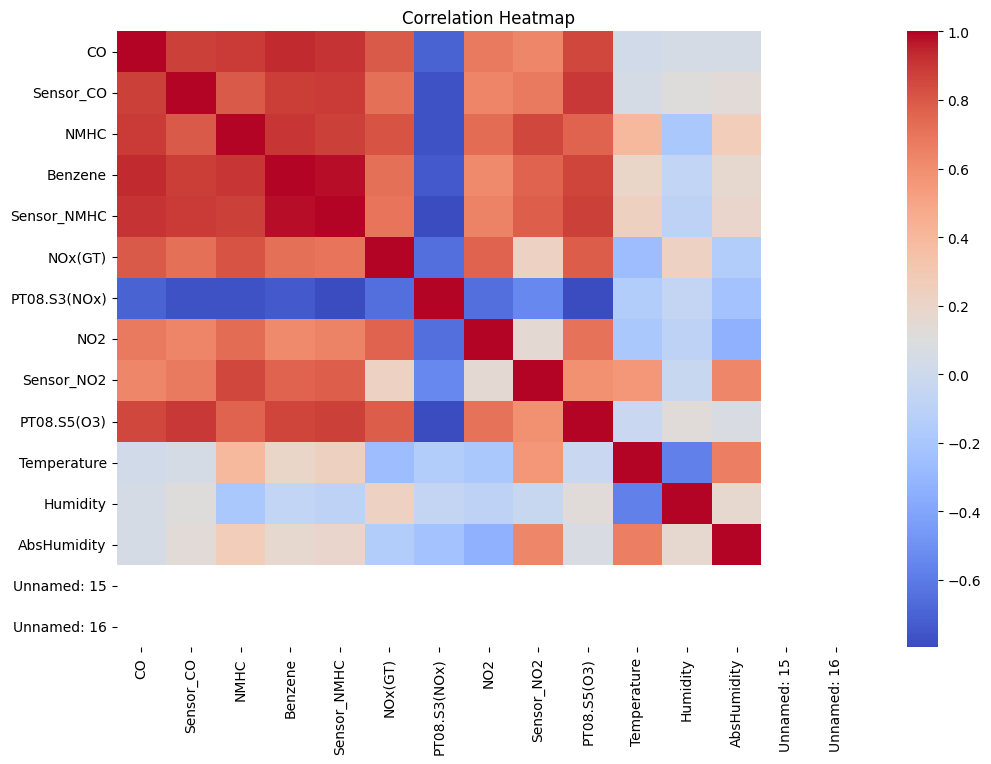

In [5]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Scatter Plots**

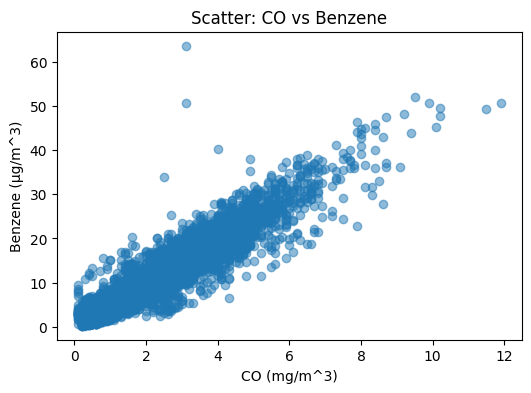

In [6]:
plt.figure(figsize=(6,4))
plt.scatter(df["CO"], df["Benzene"], alpha=0.5)
plt.xlabel("CO (mg/m^3)")
plt.ylabel("Benzene (µg/m^3)")
plt.title("Scatter: CO vs Benzene")
plt.show()

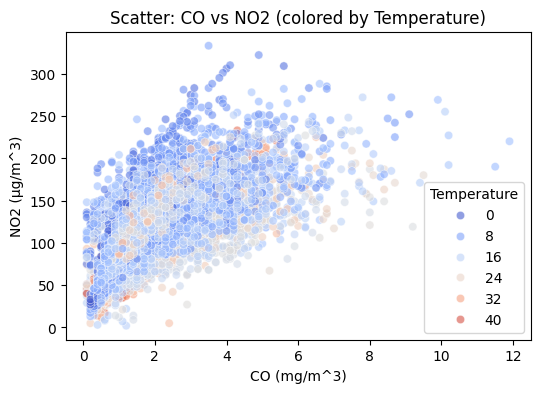

In [7]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="CO", y="NO2", hue="Temperature", palette="coolwarm", alpha=0.6)
plt.xlabel("CO (mg/m^3)")
plt.ylabel("NO2 (µg/m^3)")
plt.title("Scatter: CO vs NO2 (colored by Temperature)")
plt.show()

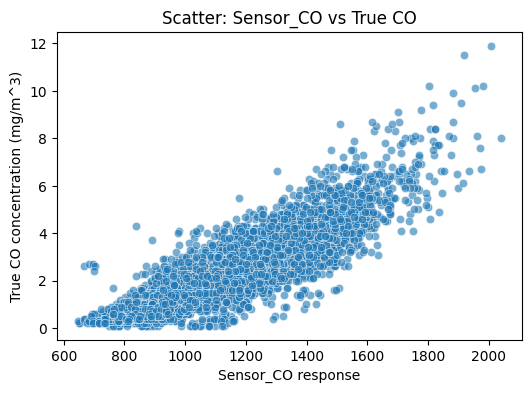

In [8]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Sensor_CO", y="CO", alpha=0.6)
plt.xlabel("Sensor_CO response")
plt.ylabel("True CO concentration (mg/m^3)")
plt.title("Scatter: Sensor_CO vs True CO")
plt.show()

**Box Plot**

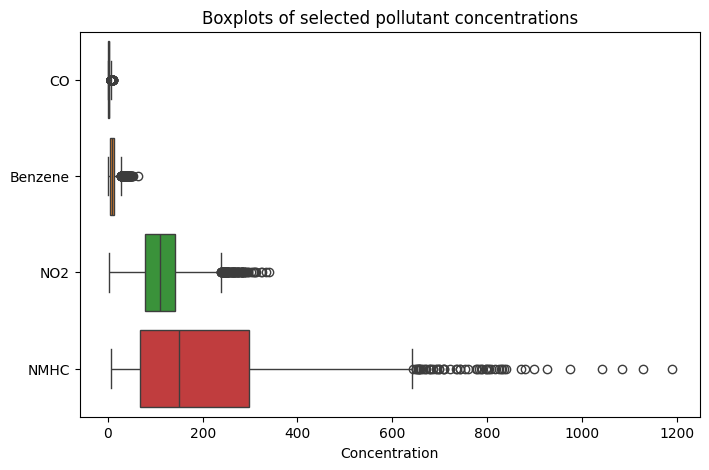

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[["CO", "Benzene", "NO2", "NMHC"]], orient='h')
plt.title("Boxplots of selected pollutant concentrations")
plt.xlabel("Concentration")
plt.show()

**Histograms**

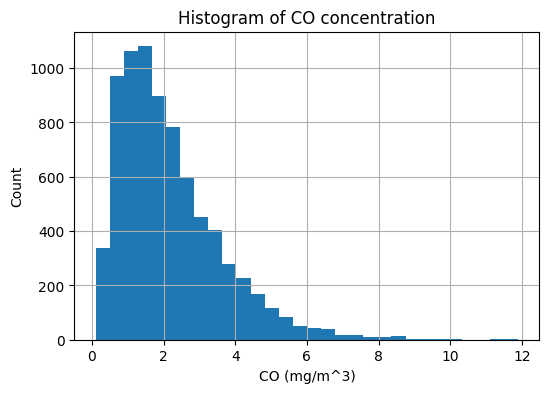

In [10]:
plt.figure(figsize=(6,4))
df["CO"].hist(bins=30)
plt.xlabel("CO (mg/m^3)")
plt.ylabel("Count")
plt.title("Histogram of CO concentration")
plt.show()

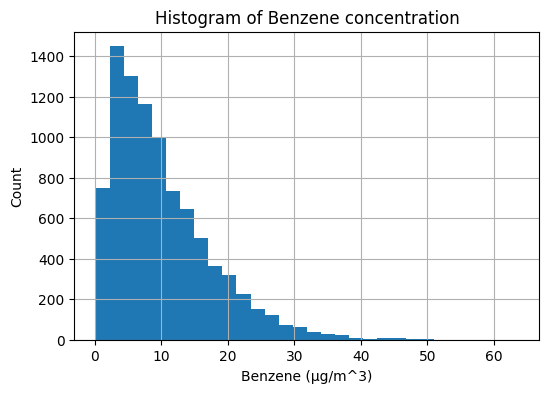

In [11]:
plt.figure(figsize=(6,4))
df["Benzene"].hist(bins=30)
plt.xlabel("Benzene (µg/m^3)")
plt.ylabel("Count")
plt.title("Histogram of Benzene concentration")
plt.show()

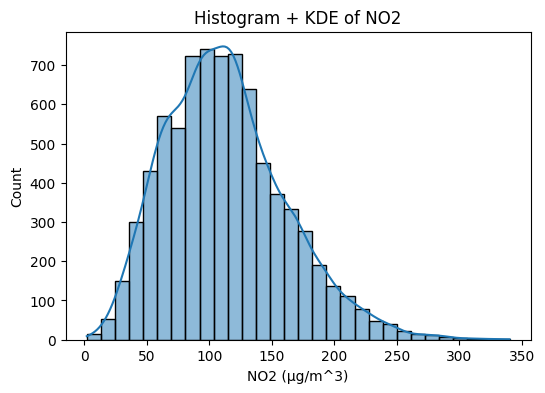

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="NO2", bins=30, kde=True)
plt.xlabel("NO2 (µg/m^3)")
plt.title("Histogram + KDE of NO2")
plt.show()

**Bar Charts**

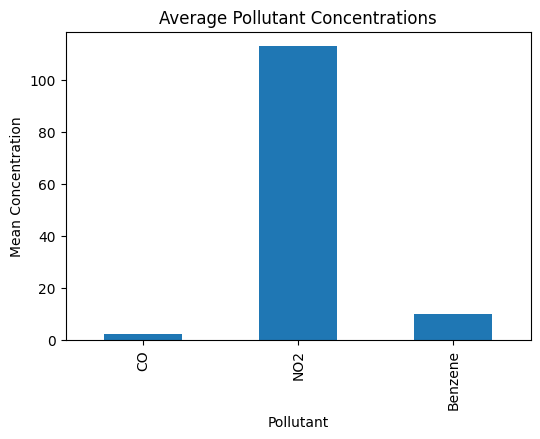

In [13]:
cols = ["CO", "NO2", "Benzene"]

mean_values = df[cols].mean()

plt.figure(figsize=(6,4))
mean_values.plot(kind="bar")
plt.title("Average Pollutant Concentrations")
plt.xlabel("Pollutant")
plt.ylabel("Mean Concentration")
plt.show()

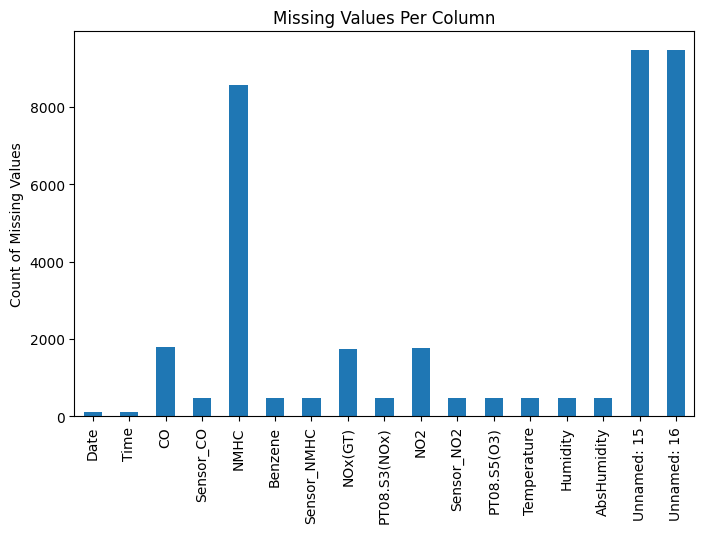

In [14]:
plt.figure(figsize=(8,5))
df.isna().sum().plot(kind="bar")
plt.title("Missing Values Per Column")
plt.ylabel("Count of Missing Values")
plt.show()

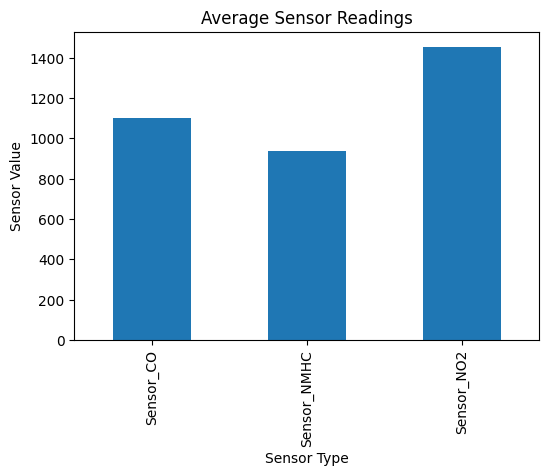

In [15]:
sensor_cols = ["Sensor_CO", "Sensor_NMHC", "Sensor_NO2"]

sensor_means = df[sensor_cols].mean()

plt.figure(figsize=(6,4))
sensor_means.plot(kind="bar")
plt.title("Average Sensor Readings")
plt.ylabel("Sensor Value")
plt.xlabel("Sensor Type")
plt.show()

****

**#Section C — Data Preparation**

In this section, the dataset is cleaned and transformed into a suitable format for machine learning.<br>
The Air Quality dataset contains:
- Missing values encoded as −200
- Incorrect data types (dates, times)
- Outliers
- Sensor drift and noise
- Non-normalized features

Each preprocessing step below includes a justification based on the requirements of machine learning models and the findings from EDA.

**Removing empty columns**

In [16]:
# Remove completely empty columns
df = df.dropna(axis=1, how='all')

df.shape


(9471, 15)

<br>

**Converting Date and Time Columns**

In [17]:
# Replace dots with colons in Time column
df['Time'] = df['Time'].str.replace('.', ':')

# Combine and convert
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce', dayfirst=True)

# Drop original columns
df = df.drop(columns=['Date', 'Time'])

df[['Datetime']].head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13828\2257477183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = df['Time'].str.replace('.', ':')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13828\2257477183.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce', dayfirst=True)


,Datetime
0,2004-03-10 18:00:00
1,2004-03-10 19:00:00
2,2004-03-10 20:00:00
3,2004-03-10 21:00:00
4,2004-03-10 22:00:00


<br>

**Missing Value Treatment**

The dataset encodes missing values as −200, which is outside physical ranges of pollutants and sensors.<br>
These values must be considered missing (NaN) before imputation or statistical analysis.

In [18]:
import numpy as np

df = df.replace(-200, np.nan)

df.isna().sum()

CO              1797
Sensor_CO        480
NMHC            8557
Benzene          480
Sensor_NMHC      480
NOx(GT)         1753
PT08.S3(NOx)     480
NO2             1756
Sensor_NO2       480
PT08.S5(O3)      480
Temperature      480
Humidity         480
AbsHumidity      480
Datetime         114
dtype: int64

<br>

**Imputation Strategy**

Because pollutant distributions are skewed and contain outliers, median imputation is more robust than mean.<br>
It prevents extreme pollution events from distorting the imputed values.<br>
Median imputation also handles sensor drift better.

In [19]:
# Select numeric columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Median impute
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

df.isna().sum()

CO                0
Sensor_CO         0
NMHC              0
Benzene           0
Sensor_NMHC       0
NOx(GT)           0
PT08.S3(NOx)      0
NO2               0
Sensor_NO2        0
PT08.S5(O3)       0
Temperature       0
Humidity          0
AbsHumidity       0
Datetime        114
dtype: int64

<br>

**Outlier Treatment**

To preserve meaningful extreme events while reducing measurement noise, we cap extreme outliers using the IQR method.<br>
This prevents models from being overly influenced by rare extreme values.

In [20]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.clip(series, lower, upper)

for col in num_cols:
    df[col] = cap_outliers(df[col])

<br>

**Feature Engineering**

To enhance predictive performance, new time-based features are extracted:

- Hour: pollution varies by traffic patterns
- Month: seasonal changes in pollution
- Day of week: weekday vs weekend differences

These features provide useful structure for machine learning models.

In [21]:
df['Hour'] = df['Datetime'].dt.hour
df['Month'] = df['Datetime'].dt.month
df['DayOfWeek'] = df['Datetime'].dt.dayofweek

df[['Hour', 'Month', 'DayOfWeek']].head()

,Hour,Month,DayOfWeek
0,18.0,3.0,2.0
1,19.0,3.0,2.0
2,20.0,3.0,2.0
3,21.0,3.0,2.0
4,22.0,3.0,2.0


<br>

**Feature Scaling**

Since the dataset mixes sensors with different units (ppm, mV, °C), feature scaling ensures equal contribution in distance-based and gradient-based models.

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cols = num_cols.drop('CO')

df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

<br>

**Train–Test Split**

The dataset is time-series-like, but because we are modeling pollutant concentration (not forecasting), a random split is allowed.<br>
For forecasting tasks, a chronological split would be required.

In [23]:
from sklearn.model_selection import train_test_split

target = 'Benzene'

x = df.drop(columns=[target, 'Datetime'])
y = df[target]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

x_train.shape, x_test.shape

((6629, 15), (2842, 15))

**Train–Test Split Summary**

The dataset was divided into training and testing subsets using a 70/30 split.<br>
This resulted in:

- Training set: 6629 samples, 15 features
- Testing set: 2842 samples, 15 features

This split ensures that the model is trained on the majority of the data while preserving a sufficiently large test set for reliable evaluation.

*****

**#Section D — Model Training**

In this section, three supervised machine learning algorithms are trained to predict the chosen target variable.<br>
The following models are selected due to their differing assumptions and strengths:

1. Linear Regression – a simple baseline model that assumes a linear relationship between features and target.
2. Random Forest Regressor – an ensemble tree-based model capable of capturing non-linear patterns and interactions between features.
3. Support Vector Regressor (SVR) – a margin-based model effective for high-dimensional data and non-linear relationships when used with kernels.

Training multiple diverse models allows systematic comparison and justification of the final model choice, as required by coursework criteria.